In [42]:
import numpy as np
from PIL import Image, ImageFilter, ImageColor
import time
import os
import subprocess
import shutil

In [47]:
def find_and_save_avg(images, prefix, prefix2):
    avg = np.zeros(images[0].size, 'int32')

    for image in images:
        avg+=np.transpose(np.asarray(image))

    avg = (avg/len(images)).astype('uint16')

    Image.fromarray(np.transpose(avg)).save(prefix+prefix2+"avg.tif")

def subtract(image1, image2, factor=1):
    ar1 = np.asarray(image1, 'int16')
    ar2 = np.asarray(image2, 'int16')
    return np.array(np.abs(ar1 - (ar2*factor)), 'uint16')

In [3]:
prefix = "/Users/natalie/Documents/year 3/IP/code/temp/20240422/"
pre_dark = "darks/"
pre_light = "lights4/"
pre_image = "images4/"


#darks_names = os.listdir(prefix+pre_dark)
lights_names = os.listdir(prefix+pre_light)
red_names = os.listdir(prefix+pre_image+"r")
blue_names = os.listdir(prefix+pre_image+"b")
green_names = os.listdir(prefix+pre_image+"g")

try:
    lights_names.remove('.DS_Store')
except:
    pass
try:
    red_names.remove('.DS_Store')
except:
    pass
try:
    green_names.remove('.DS_Store')
except:
    pass
try:
    blue_names.remove('.DS_Store')
except:
    pass
try:
    blue_names.remove('half')
except:
    pass
try:
    green_names.remove('half')
except:
    pass
try:
    red_names.remove('half')
except:
    pass
try:
    lights_names.remove('avg.tif')
except:
    pass

#darks = [Image.open(prefix+pre_dark+dark) for dark in darks_names]
lights = [Image.open(prefix+pre_light+light) for light in lights_names]
reds = [Image.open(prefix+pre_image+"r/"+red) for red in red_names]
greens = [Image.open(prefix+pre_image+"g/"+green) for green in green_names]
blues = [Image.open(prefix+pre_image+"b/"+blue) for blue in blue_names]

#find_and_save_avg(darks, prefix, pre_dark)
find_and_save_avg(lights, prefix, pre_light)

In [4]:
def half(images, names, color, avg_name):
    try:
        os.mkdir(f"/Users/natalie/Documents/year 3/IP/code/temp/20240422/images4/{color}/half/")
    except:
        print("already there")
    avg_ary = np.asarray(Image.open(avg_name))
    
    for i in range(len(images)):
        done1 = subtract(images[i], avg_ary, 1)
        #done1 = subtract(images[i], 0)
        #done3 = subtract(done1, avg_ary)
        #done4 = subtract(-done1, -65536)
        Image.fromarray(done1).save(f"/Users/natalie/Documents/year 3/IP/code/temp/20240422/images4/{color}/half/{names[i]}")
        
def process(image, other):
    top = 0
    bottom = -1700
    left = 1250
    right = -1
    
    cropped_me = np.asarray(image)[top:bottom, left:right]
    cropped_you = np.asarray(image)[top:bottom, left:right]
    output = subtract(cropped_me,cropped_you)
    return Image.fromarray(output)

In [5]:
half(greens, green_names, 'g', '/Users/natalie/Documents/year 3/IP/code/temp/20240422/lights4/avg.tif')
half(blues, blue_names, 'b', '/Users/natalie/Documents/year 3/IP/code/temp/20240422/lights4/avg.tif')
half(reds, red_names, 'r', '/Users/natalie/Documents/year 3/IP/code/temp/20240422/lights4/avg.tif')

already there
already there
already there


In [6]:
process(Image.open("/Users/natalie/Documents/year 3/IP/code/temp/20240422/lights4/120021.tiff"), Image.open("/Users/natalie/Documents/year 3/IP/code/temp/20240422/images4/g/avg.tif")).save("a.tif")

In [7]:
find_and_save_avg(greens, prefix, pre_image+"/g/")

In [102]:
clean = Image.open('../final report/images/clean.jpg')

clean_r = np.array(clean)
clean_r[:,:,1] *= 0
clean_r[:,:,2] *= 0
clean_r = Image.fromarray(clean_r, mode="RGB")
clean_r.save('../final report/images/clean_r.jpg')

clean_g = np.array(clean)
clean_g[:,:,0] *= 0
clean_g[:,:,2] *= 0
clean_g = Image.fromarray(clean_g, mode="RGB")
clean_g.save('../final report/images/clean_g.jpg')

clean_b = np.array(clean)
clean_b[:,:,1] *= 0
clean_b[:,:,0] *= 0
clean_b = Image.fromarray(clean_b, mode="RGB")
clean_b.save('../final report/images/clean_b.jpg')

unclean = Image.open('../final report/images/unclean.jpg')

unclean_r = np.array(unclean)
unclean_r[:,:,1] *= 0
unclean_r[:,:,2] *= 0
unclean_r = Image.fromarray(unclean_r, mode="RGB")
unclean_r.save('../final report/images/unclean_r.jpg')

unclean_g = np.array(unclean)
unclean_g[:,:,0] *= 0
unclean_g[:,:,2] *= 0
unclean_g = Image.fromarray(unclean_g, mode="RGB")
unclean_g.save('../final report/images/unclean_g.jpg')

unclean_b = np.array(unclean)
unclean_b[:,:,1] *= 0
unclean_b[:,:,0] *= 0
unclean_b = Image.fromarray(unclean_b, mode="RGB")
unclean_b.save('../final report/images/unclean_b.jpg')

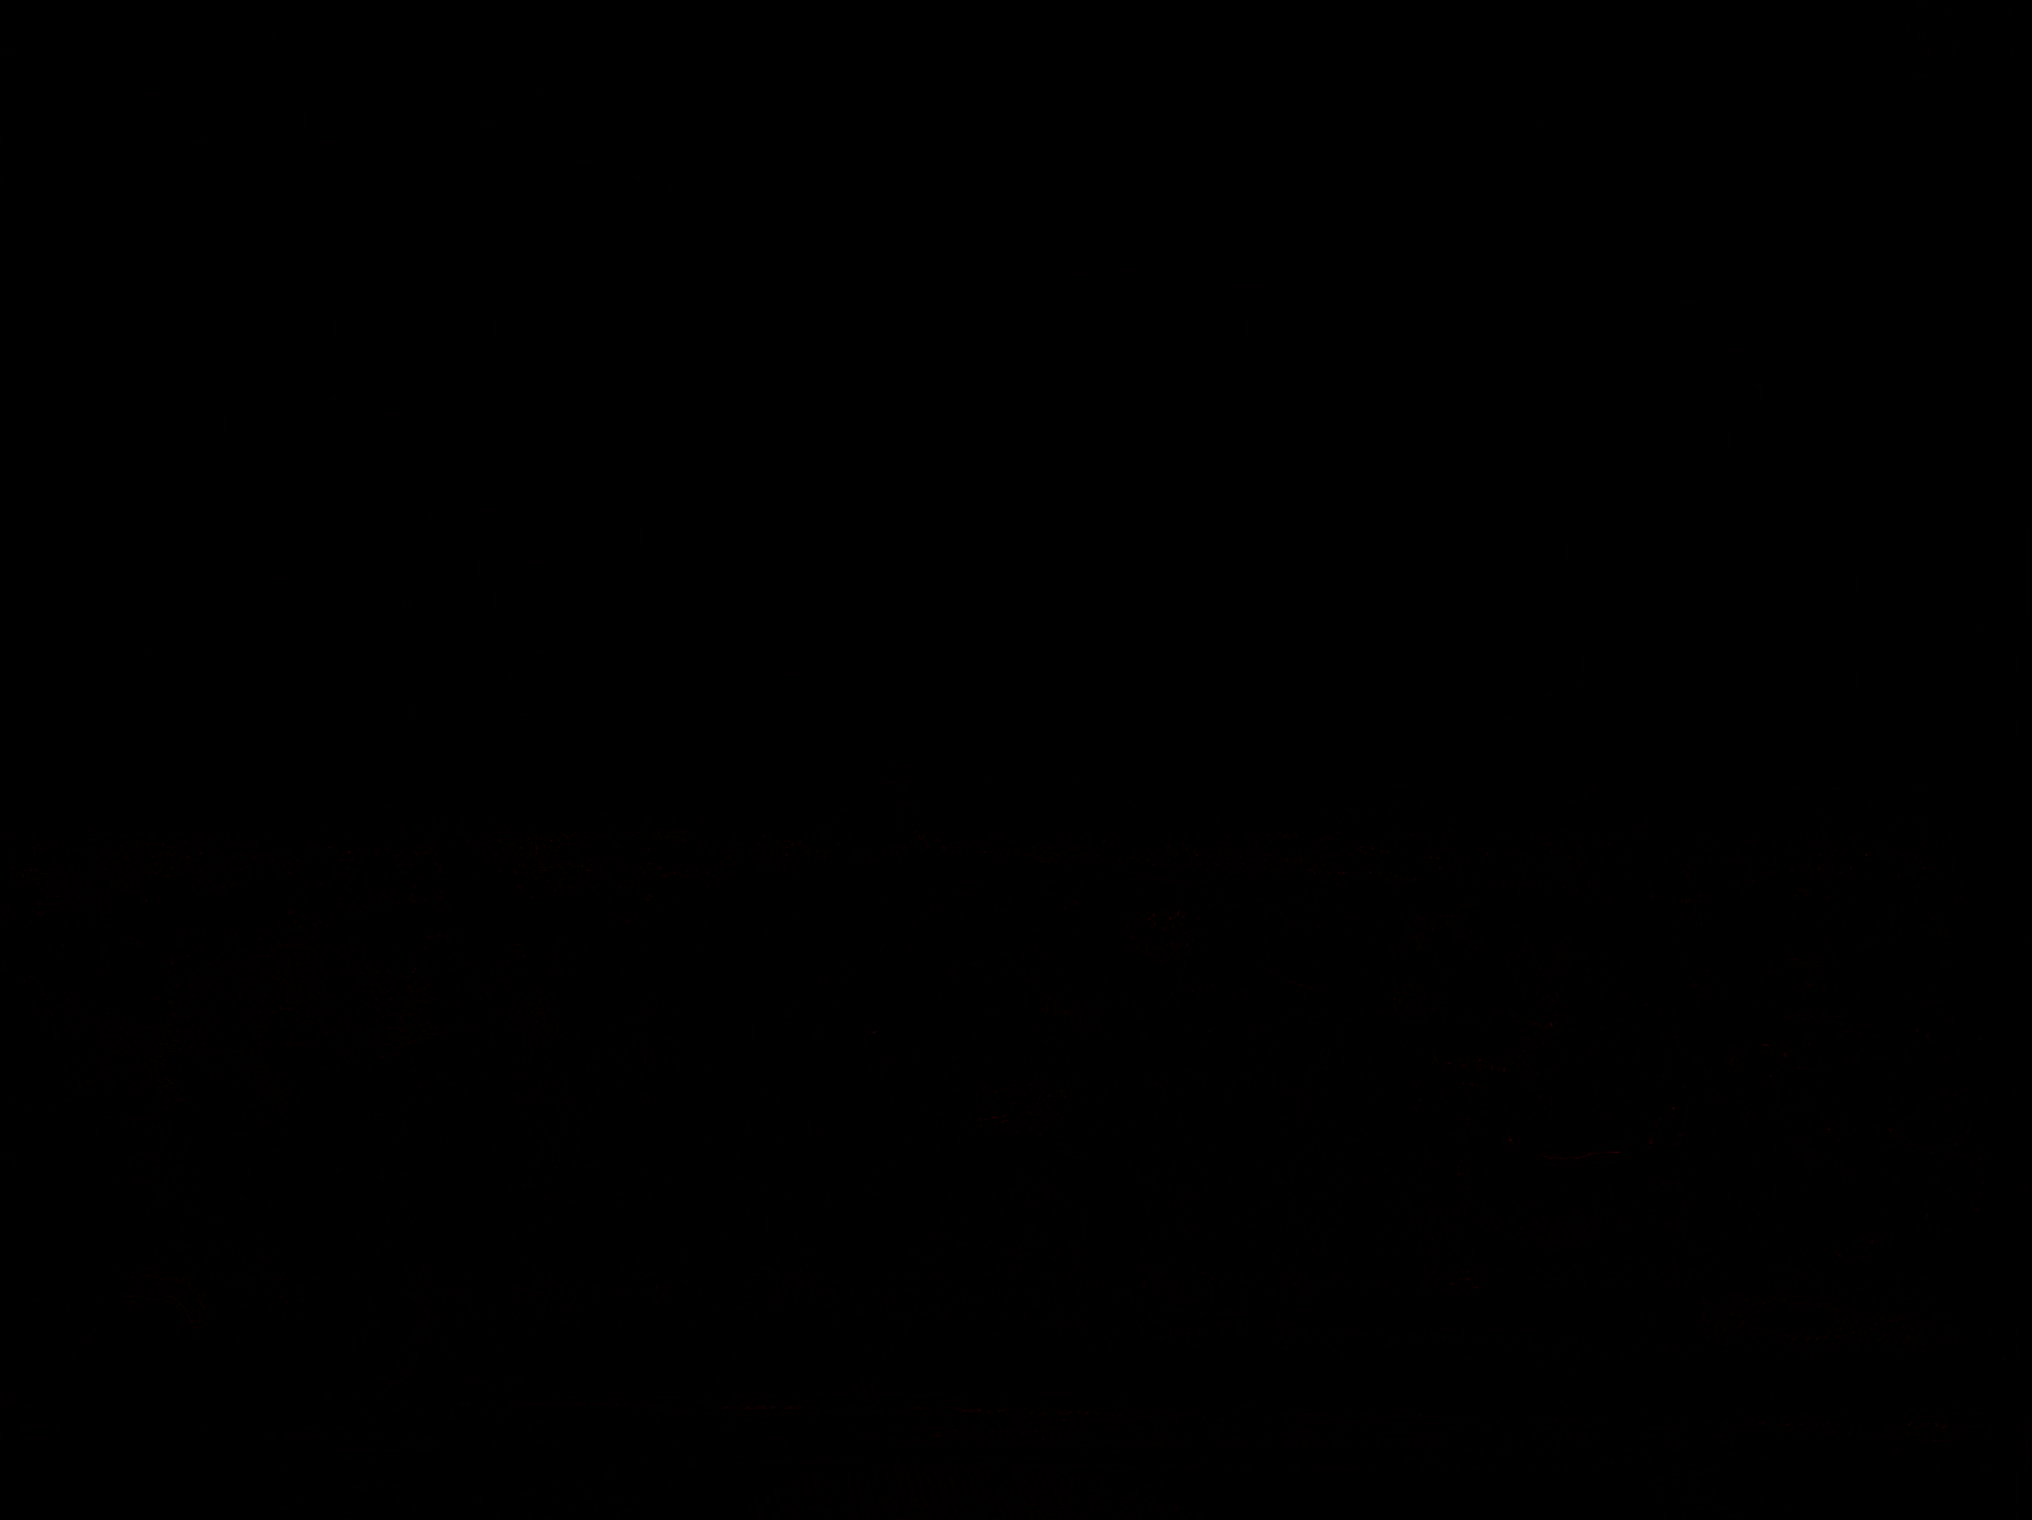

In [99]:
clean_r

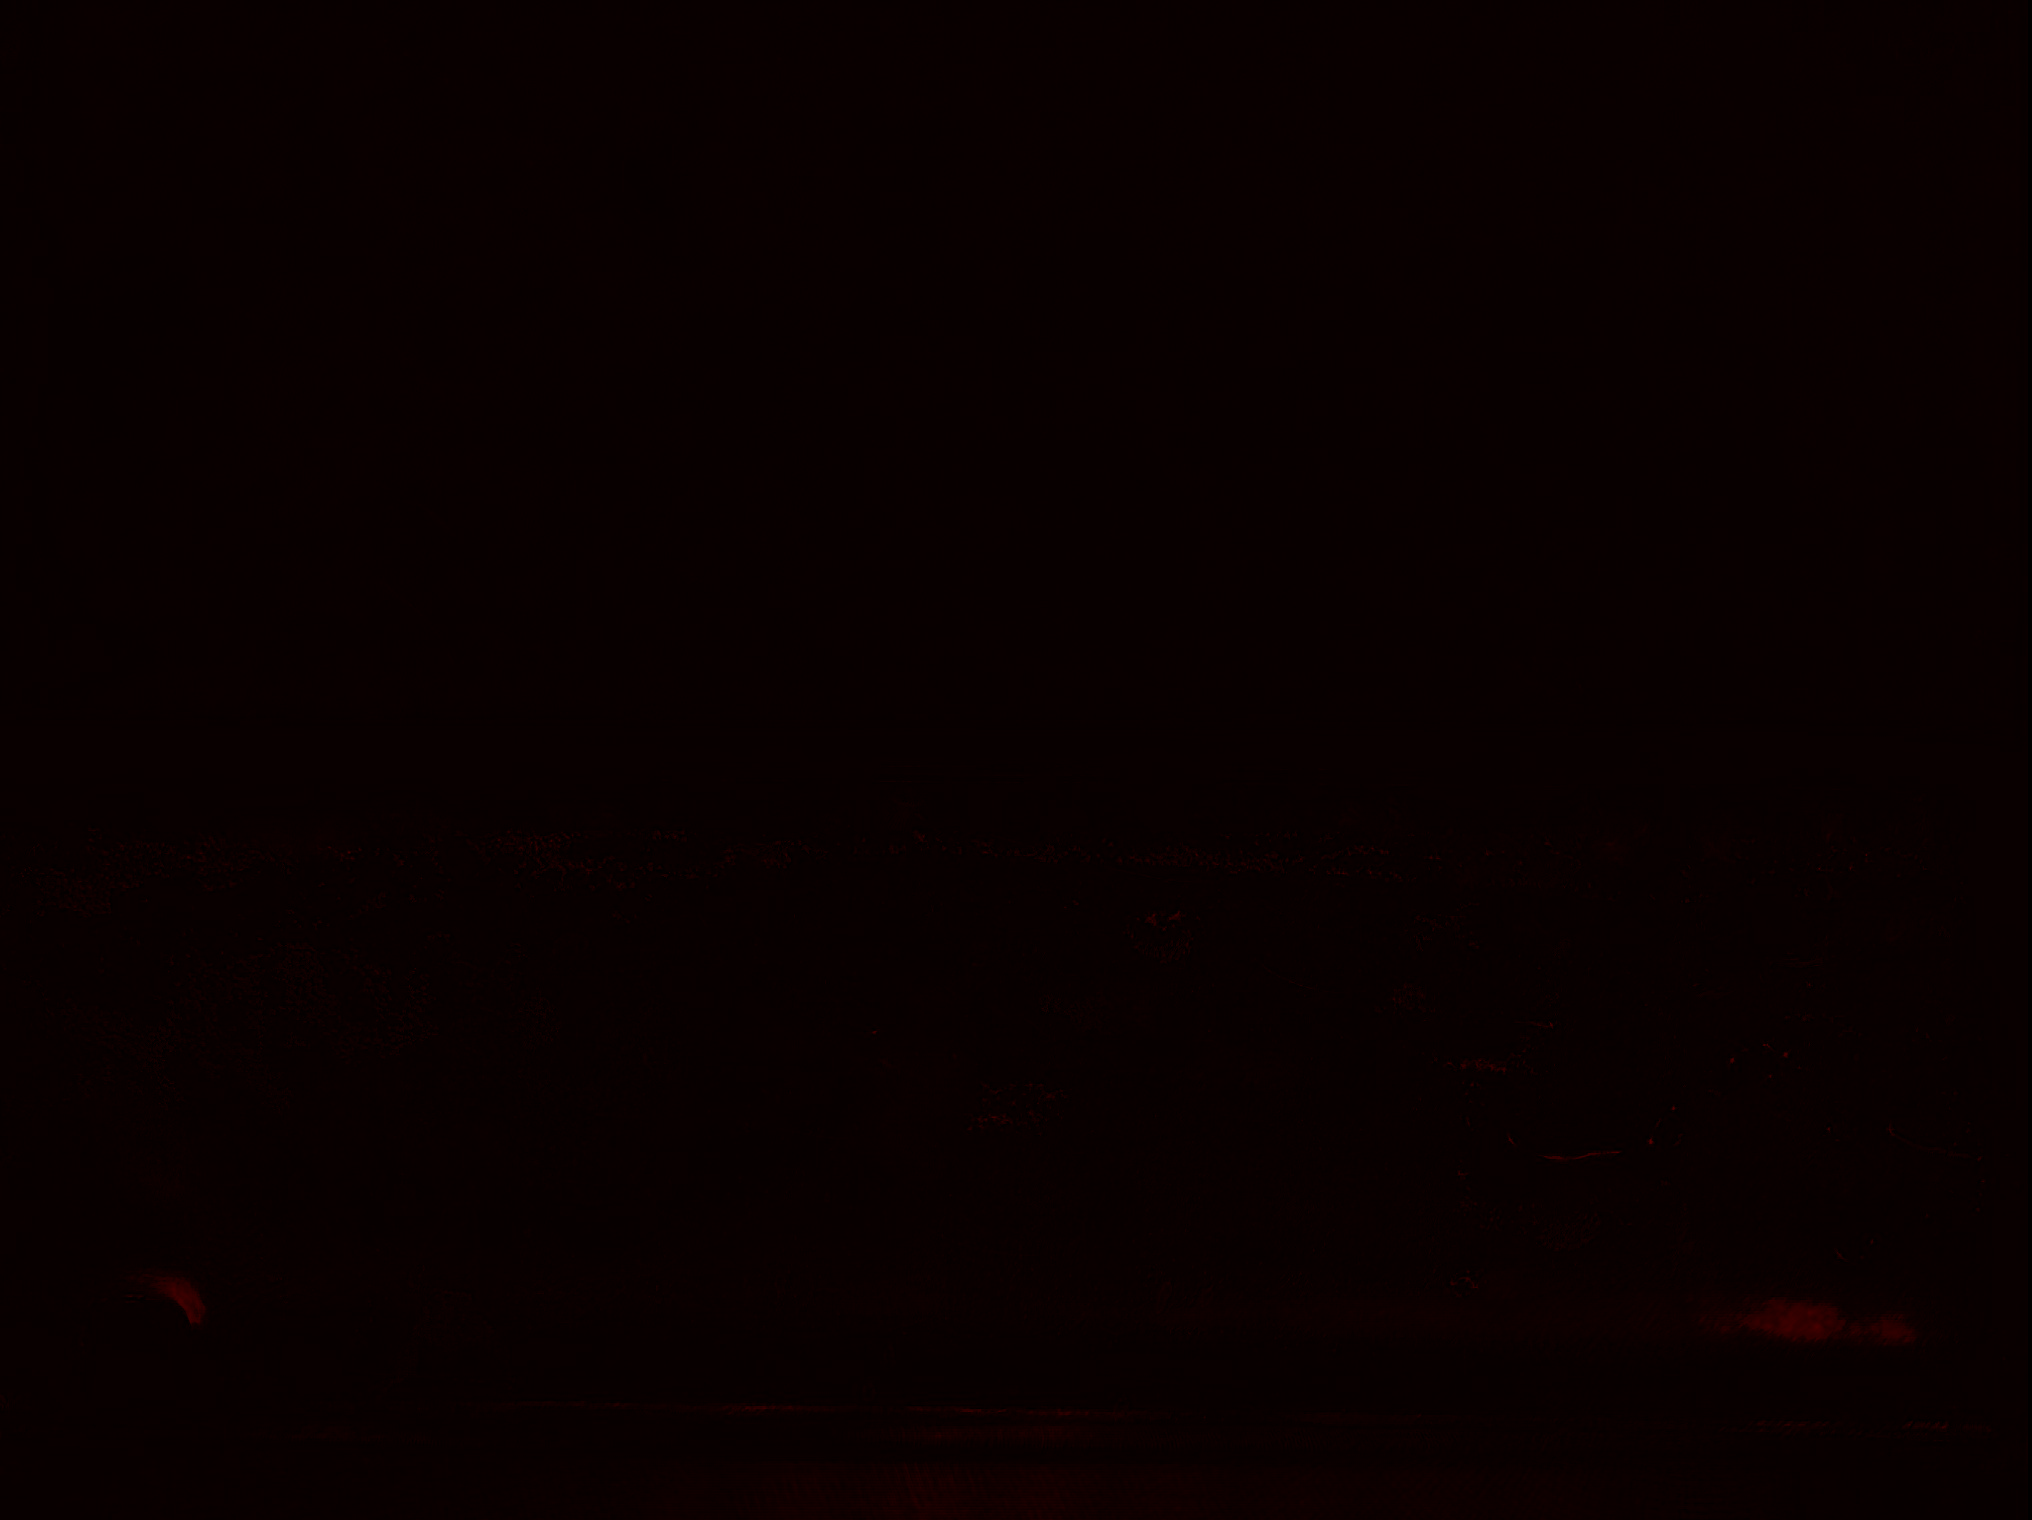

In [100]:
unclean_r

In [101]:
np.mean(np.abs(np.array(clean_g) - np.array(unclean_g)))

81.14116579897085

# may 1st

In [49]:
path = '/Users/natalie/Documents/year 3/IP/code/temp/20240501/'
first = Image.open(path + "110327.tiff")
second = Image.open(path + "110332.tiff")
last = Image.open(path + "111458.tiff")
investigate = Image.open(path + "111218.tiff")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/natalie/Documents/year 3/IP/code/temp/20240501/110327.tiff'

In [40]:
Image.fromarray(subtract(first, last)).save("last.tiff")
Image.fromarray(subtract(first, second)).save("second.tiff")
Image.fromarray(subtract(first, investigate)).save("investigate.tiff")

In [53]:
files = os.listdir(path)

try:
    files.remove("avg.tif")
except:
    pass
try:
    files.remove("particles")
except:
    pass
try:
    files.remove(".DS_Store")
except:
    pass

try:
    shutil.rmtree(path+"particles")
except:
    pass
os.mkdir(path+'particles')

images = [Image.open(path + file) for file in files]
find_and_save_avg(images, path, "")
avg = Image.open(path+"avg.tif")

print(path+f"particles/{0}.tiff")
[Image.fromarray(subtract(avg, images[i])).save(path+f"particles/{i}.tiff") for i in range(len(images))]

/Users/natalie/Documents/year 3/IP/code/temp/20240501/particles/0.tiff


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]